<a href="https://colab.research.google.com/github/ssravali/Research-1/blob/master/datamodeling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Libraries initiated
import numpy as np
import pickle
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import logging
from time import time
import pandas as pd
from keras.layers import Flatten
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.layers import Conv1D, Dropout
from keras.layers import MaxPooling1D
import scipy.io as sio
from scipy import stats
import keras
import random
print("Imported libraries")

Imported libraries


In [0]:
#Data loading
for i in range(1,11):
    if i == 1:
        s = 'EMG' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        EMG = np.array(mat_contents['EMG'])
        inc = 2800 - int(EMG.shape[1])
        x_EMG = np.pad(EMG,((0,0),(0,inc),(0,0)),'constant')
        s = 'ACC' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        ACC = np.array(mat_contents['ACC'])
        x_ACC = np.pad(ACC,((0,0),(0,inc),(0,0)),'constant')
        s = 'Y' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        Y = np.array(mat_contents['Y'])
    else:
        s = 'EMG' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        EMG = np.array(mat_contents['EMG'])
        inc = 2800 - int(EMG.shape[1])
        EMG = np.pad(EMG,((0,0),(0,inc),(0,0)),'constant')
        x_EMG = np.concatenate((x_EMG,EMG),axis = 0)
        s = 'ACC' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        ACC = np.array(mat_contents['ACC'])
        ACC = np.pad(ACC,((0,0),(0,inc),(0,0)),'constant')
        x_ACC = np.concatenate((x_ACC,ACC),axis = 0)
        s = 'Y' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        Y = np.concatenate((Y,np.array(mat_contents['Y'])),axis = 0)
        
print ('The shape of output is: ',Y.shape)
print ('The shape of input EMG is: ',x_EMG.shape)
print ('The shape of input ACC is: ',x_ACC.shape)
classes = np.unique(Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

[y_m,y_n] = Y.shape
[x1_m,x1_n,x1_ch] = x_EMG.shape
[x2_m,x2_n,x2_ch] = x_ACC.shape

The shape of output is:  (3120, 1)
The shape of input EMG is:  (3120, 2800, 16)
The shape of input ACC is:  (3120, 2800, 3)
Total number of outputs :  52
Output classes :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]


- Aim of below code is to find which exercises are most different from one another. 
- A single trial from each person per exercise is taken and co related to see their independence

ex = 1


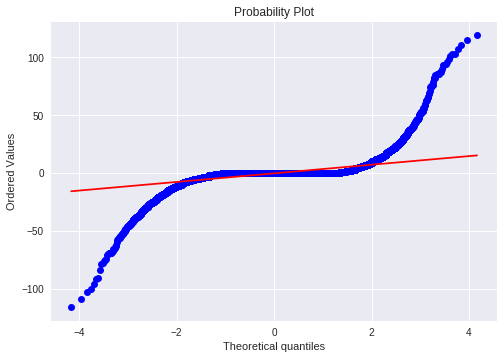

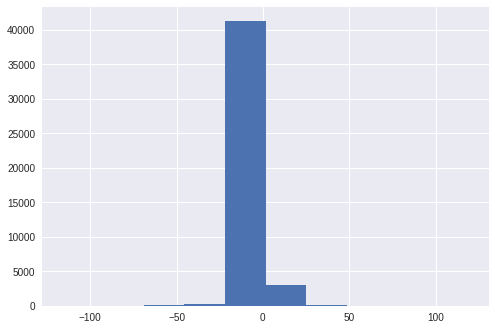

mean=-0.244 stdv=6.038
Statistics=0.380, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=22561.810, p=0.000
Sample does not look Gaussian (reject H0)
ex = 2


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


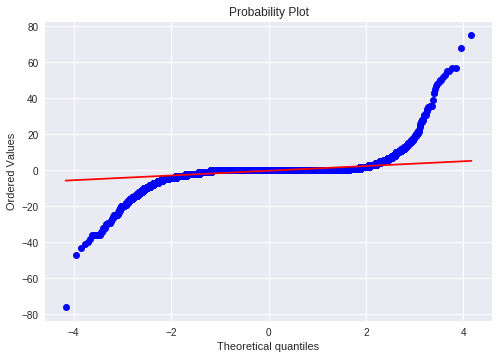

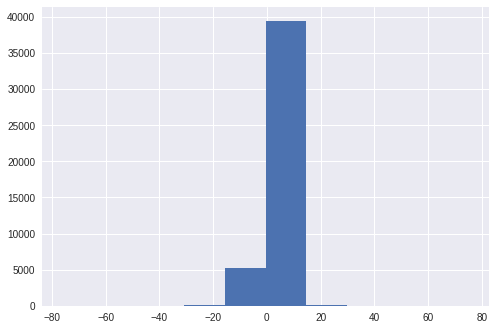

mean=-0.184 stdv=2.420
Statistics=0.296, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=32965.951, p=0.000
Sample does not look Gaussian (reject H0)
ex = 3


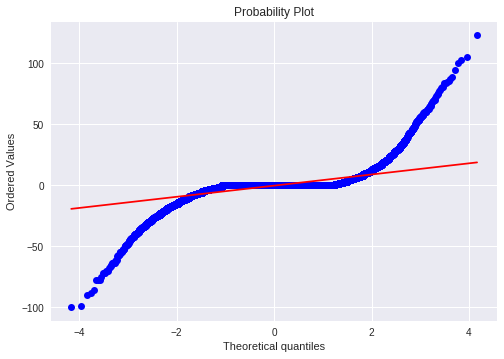

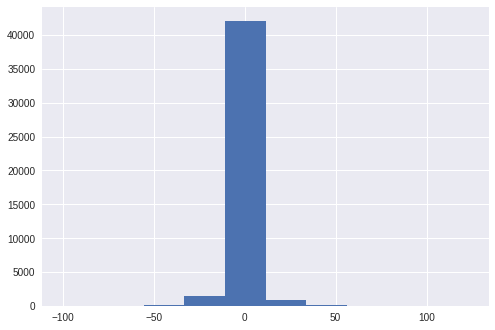

mean=-0.251 stdv=6.710
Statistics=0.465, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=17769.926, p=0.000
Sample does not look Gaussian (reject H0)
ex = 4


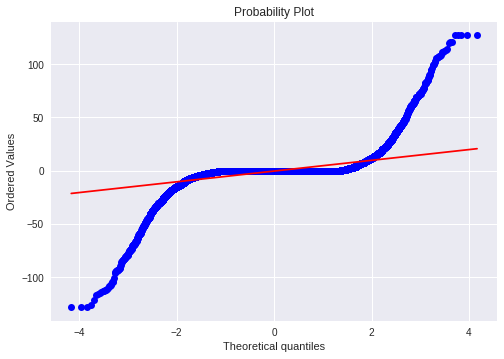

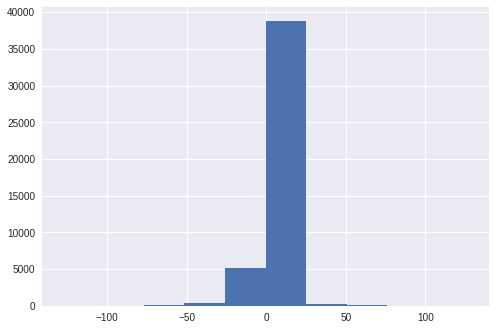

mean=-0.269 stdv=8.611
Statistics=0.342, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=16597.351, p=0.000
Sample does not look Gaussian (reject H0)
ex = 5


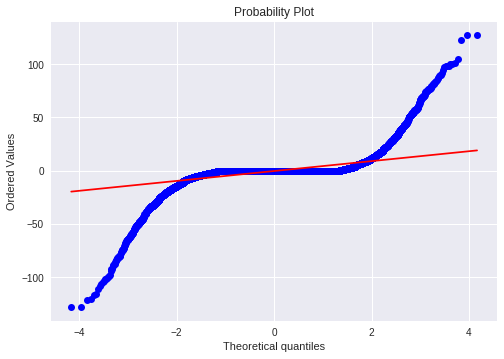

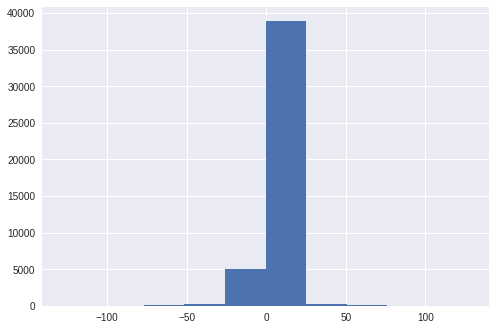

mean=-0.216 stdv=7.640
Statistics=0.369, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=16378.825, p=0.000
Sample does not look Gaussian (reject H0)
ex = 6


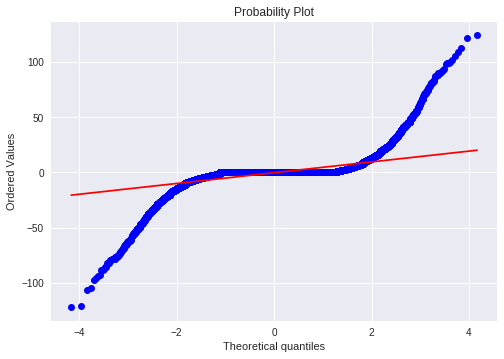

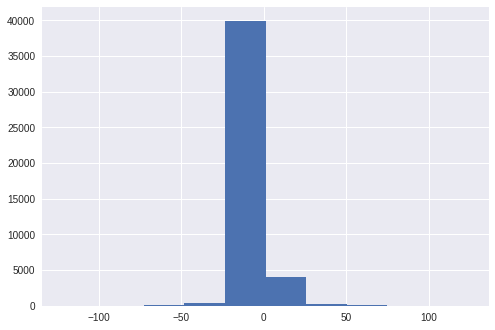

mean=-0.246 stdv=7.631
Statistics=0.409, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14946.235, p=0.000
Sample does not look Gaussian (reject H0)
ex = 7


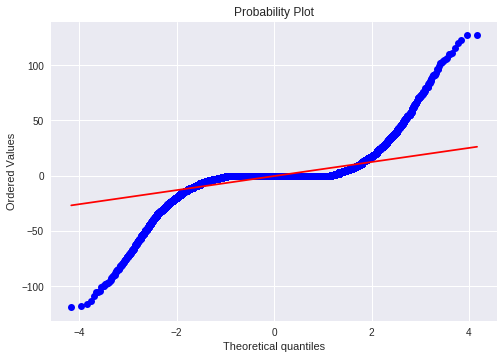

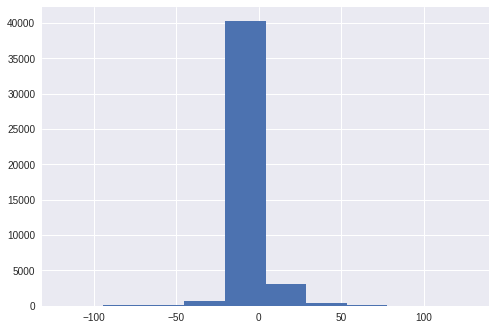

mean=-0.302 stdv=9.287
Statistics=0.470, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=13660.483, p=0.000
Sample does not look Gaussian (reject H0)
ex = 8


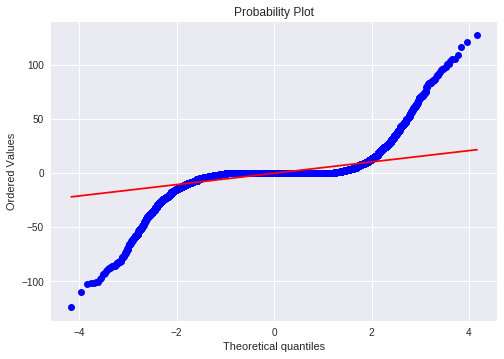

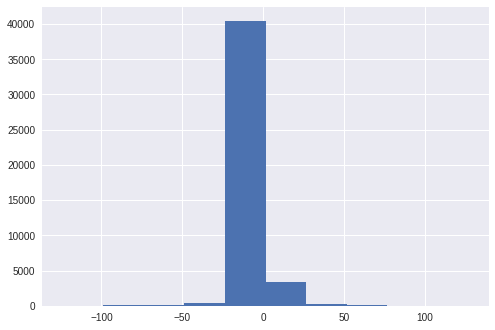

mean=-0.301 stdv=8.159
Statistics=0.410, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14913.798, p=0.000
Sample does not look Gaussian (reject H0)
ex = 9


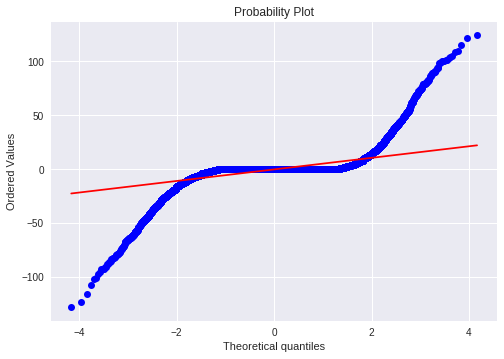

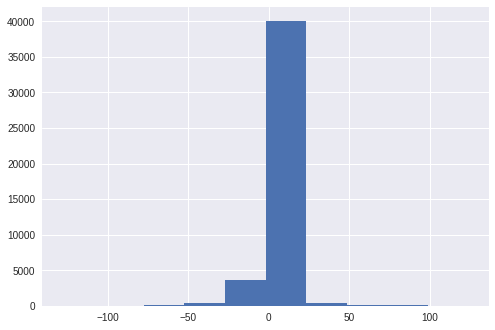

mean=-0.232 stdv=8.550
Statistics=0.393, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=16145.618, p=0.000
Sample does not look Gaussian (reject H0)
ex = 10


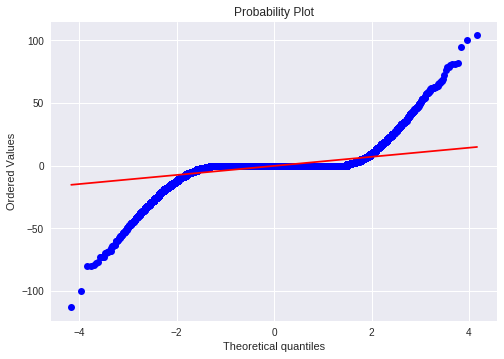

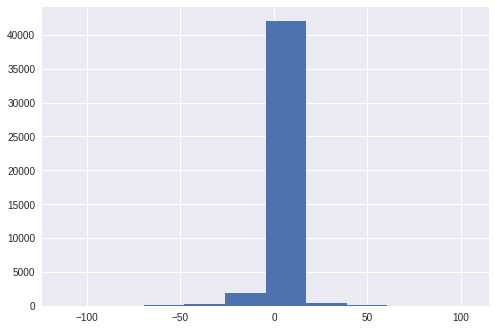

mean=-0.168 stdv=6.135
Statistics=0.349, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14948.828, p=0.000
Sample does not look Gaussian (reject H0)
ex = 11


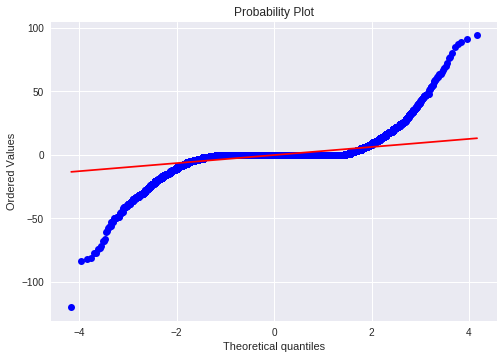

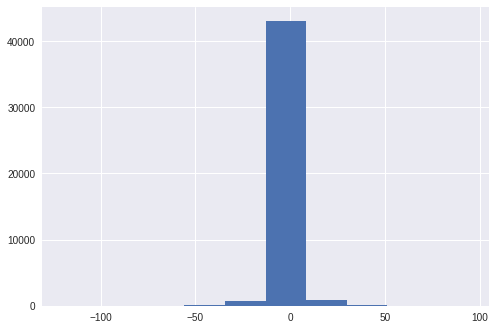

mean=-0.194 stdv=5.179
Statistics=0.376, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=15797.362, p=0.000
Sample does not look Gaussian (reject H0)
ex = 12


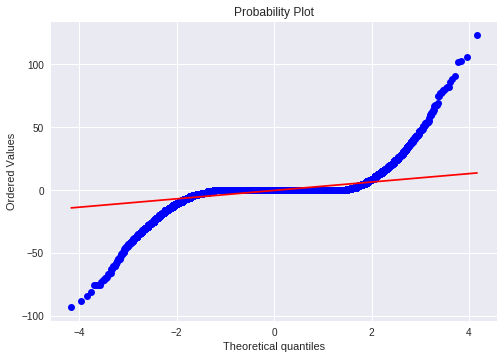

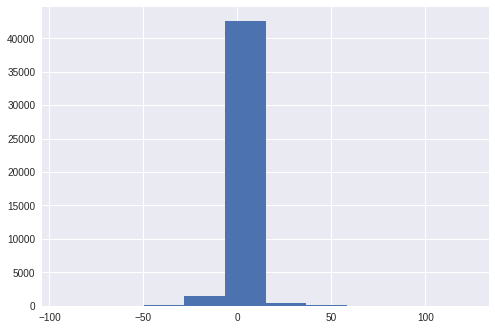

mean=-0.181 stdv=5.650
Statistics=0.348, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=19416.516, p=0.000
Sample does not look Gaussian (reject H0)
ex = 13


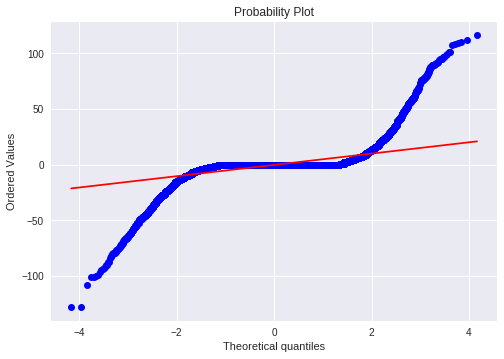

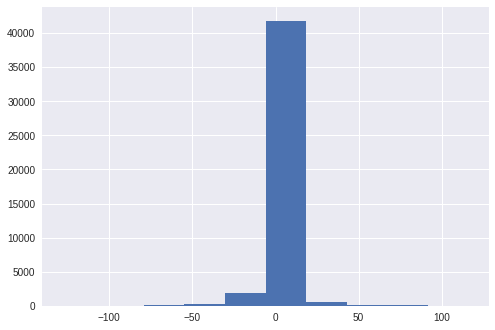

mean=-0.237 stdv=8.177
Statistics=0.385, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=16014.344, p=0.000
Sample does not look Gaussian (reject H0)
ex = 14


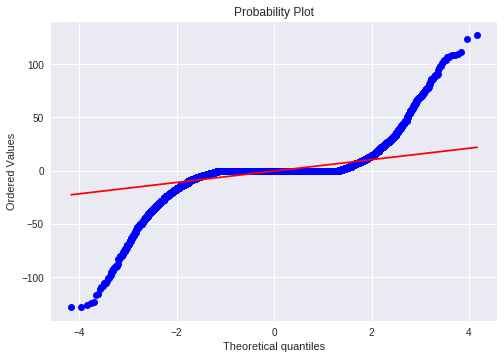

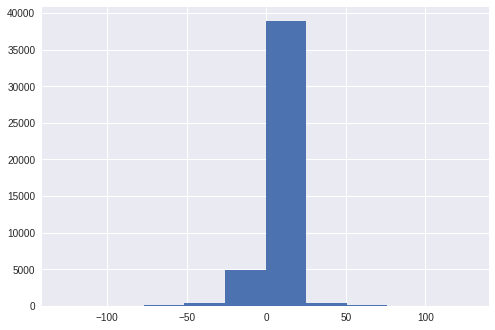

mean=-0.239 stdv=8.436
Statistics=0.402, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=15439.873, p=0.000
Sample does not look Gaussian (reject H0)
ex = 15


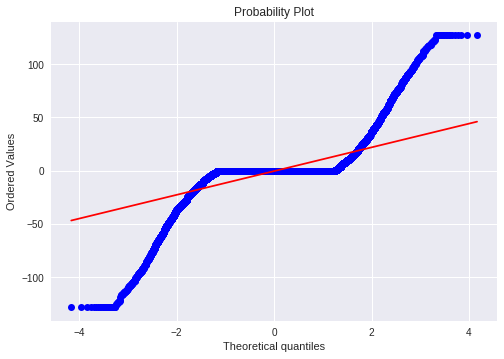

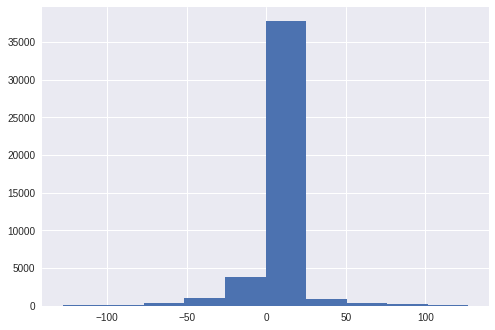

mean=-0.290 stdv=15.954
Statistics=0.487, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=11337.873, p=0.000
Sample does not look Gaussian (reject H0)
ex = 16


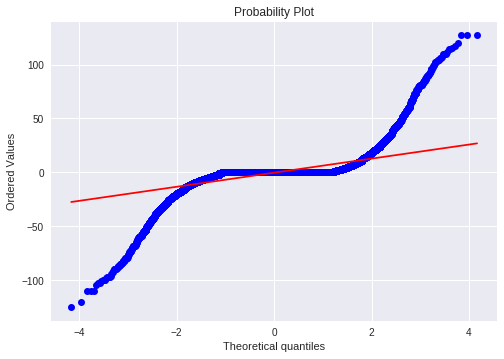

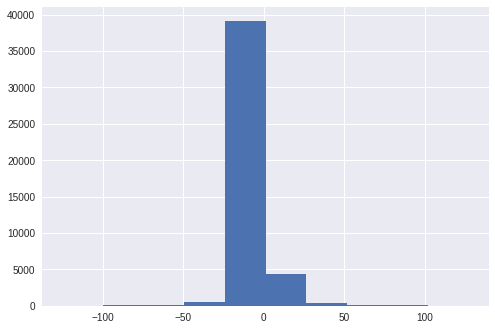

mean=-0.274 stdv=9.738
Statistics=0.449, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14300.305, p=0.000
Sample does not look Gaussian (reject H0)
ex = 17


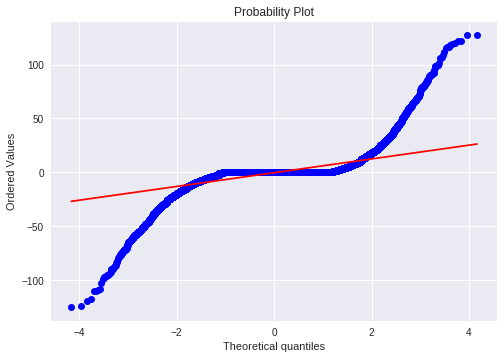

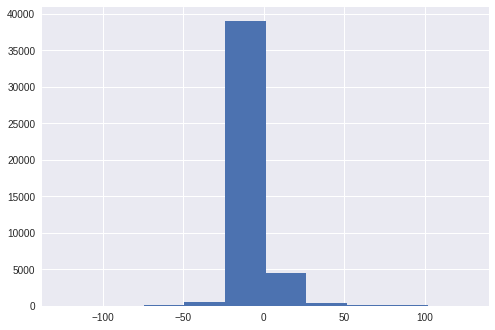

mean=-0.269 stdv=9.345
Statistics=0.466, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=15408.602, p=0.000
Sample does not look Gaussian (reject H0)
ex = 18


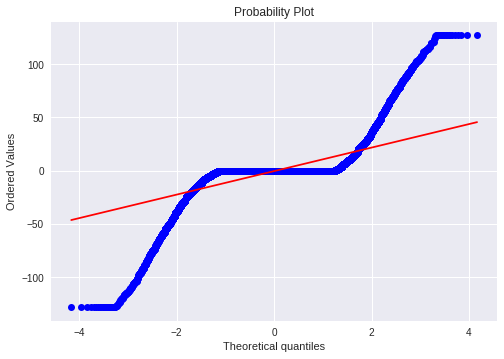

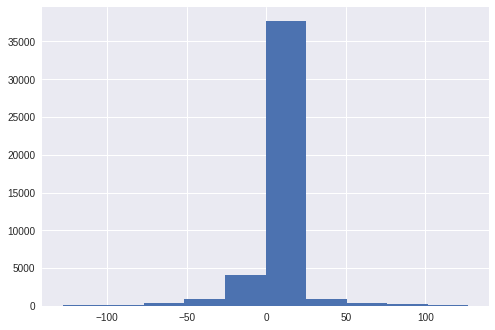

mean=-0.292 stdv=15.987
Statistics=0.476, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=11572.971, p=0.000
Sample does not look Gaussian (reject H0)
ex = 19


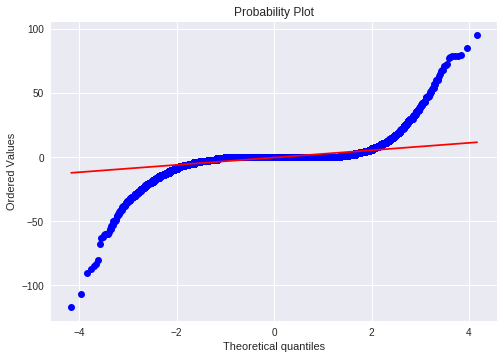

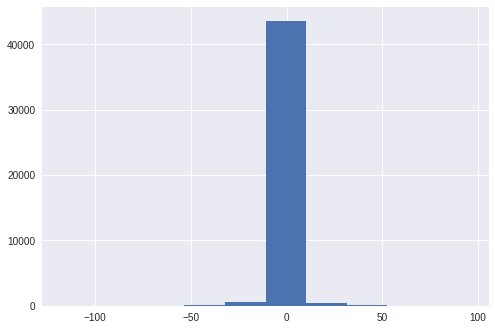

mean=-0.265 stdv=4.593
Statistics=0.388, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=17522.584, p=0.000
Sample does not look Gaussian (reject H0)
ex = 20


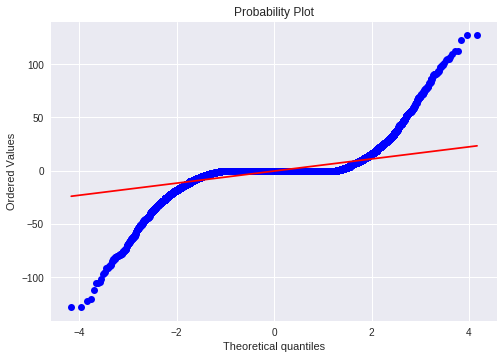

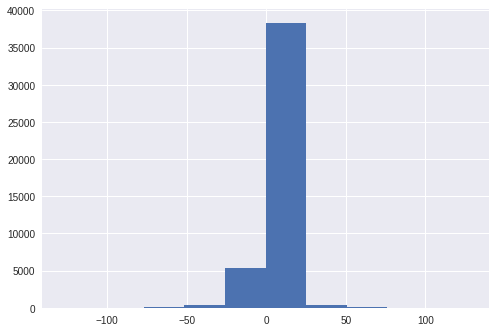

mean=-0.245 stdv=8.684
Statistics=0.428, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14292.992, p=0.000
Sample does not look Gaussian (reject H0)
ex = 21


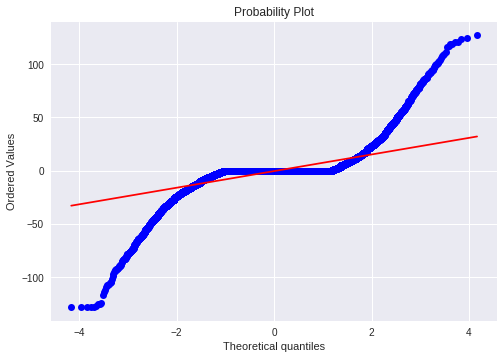

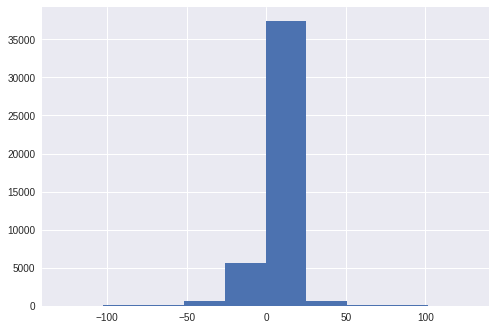

mean=-0.290 stdv=10.962
Statistics=0.505, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12510.698, p=0.000
Sample does not look Gaussian (reject H0)
ex = 22


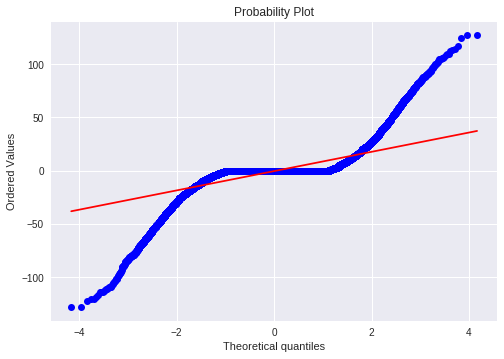

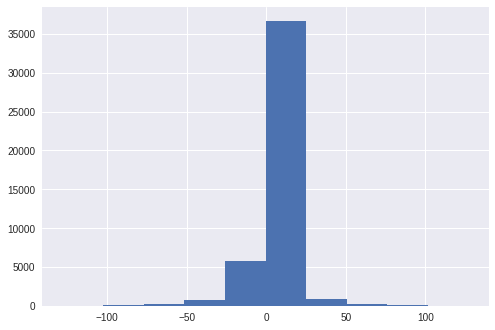

mean=-0.300 stdv=12.426
Statistics=0.530, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=11423.064, p=0.000
Sample does not look Gaussian (reject H0)
ex = 23


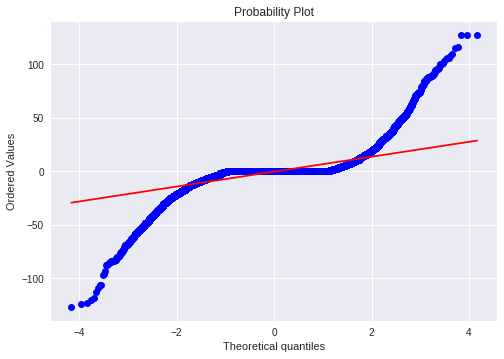

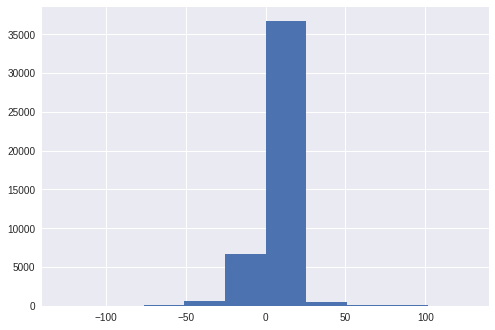

mean=-0.305 stdv=9.731
Statistics=0.513, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14060.565, p=0.000
Sample does not look Gaussian (reject H0)
ex = 24


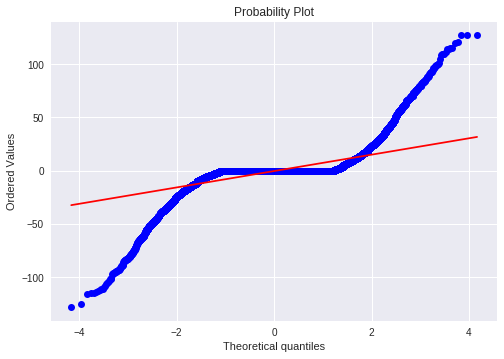

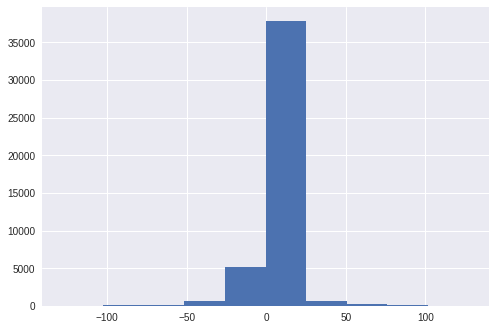

mean=-0.243 stdv=11.088
Statistics=0.480, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12415.838, p=0.000
Sample does not look Gaussian (reject H0)
ex = 25


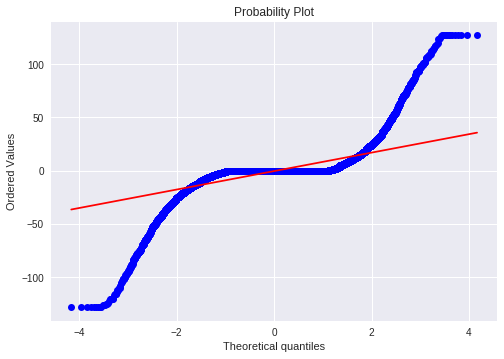

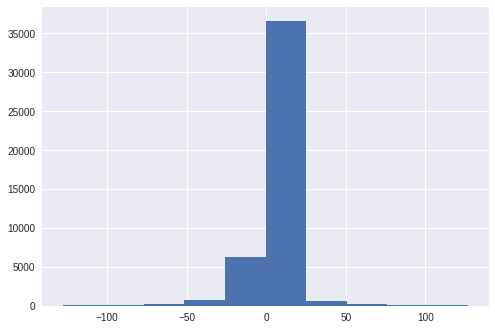

mean=-0.279 stdv=12.405
Statistics=0.487, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=13014.681, p=0.000
Sample does not look Gaussian (reject H0)
ex = 26


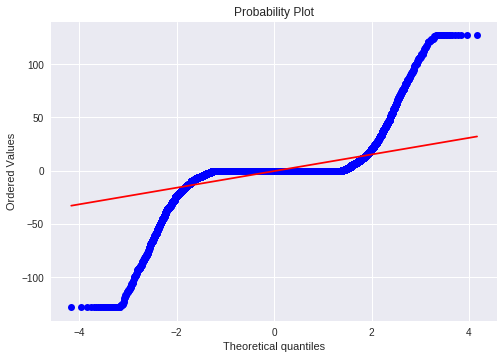

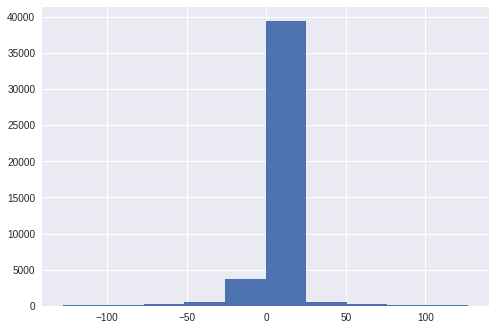

mean=-0.288 stdv=13.048
Statistics=0.357, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=15018.347, p=0.000
Sample does not look Gaussian (reject H0)
ex = 27


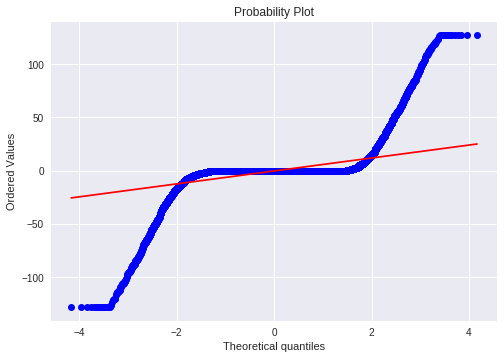

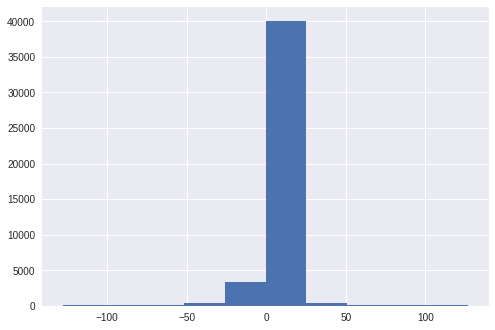

mean=-0.159 stdv=11.078
Statistics=0.300, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=15177.172, p=0.000
Sample does not look Gaussian (reject H0)
ex = 28


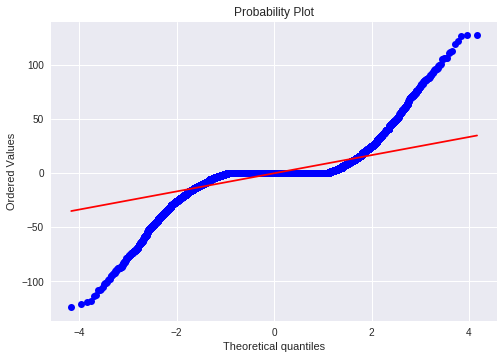

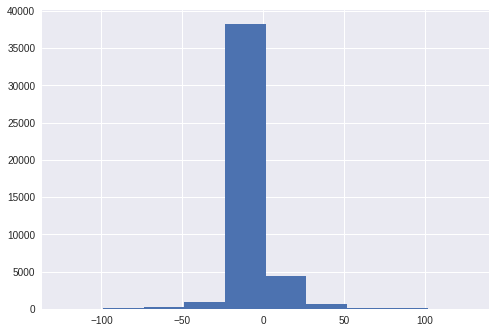

mean=-0.307 stdv=11.397
Statistics=0.540, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=11638.898, p=0.000
Sample does not look Gaussian (reject H0)
ex = 29


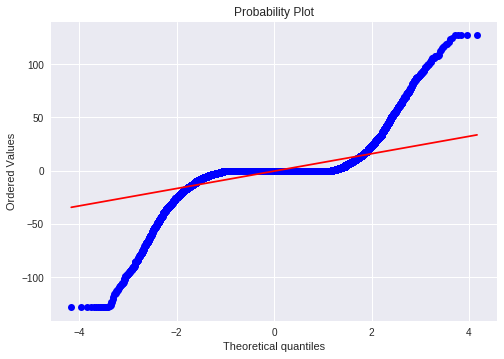

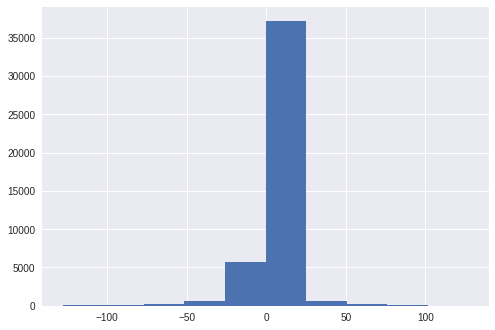

mean=-0.300 stdv=12.206
Statistics=0.447, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14267.160, p=0.000
Sample does not look Gaussian (reject H0)
ex = 30


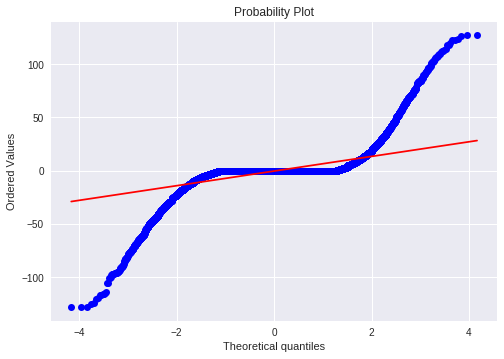

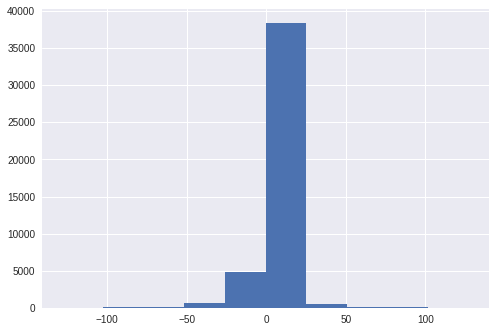

mean=-0.254 stdv=10.552
Statistics=0.423, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=13969.559, p=0.000
Sample does not look Gaussian (reject H0)
ex = 31


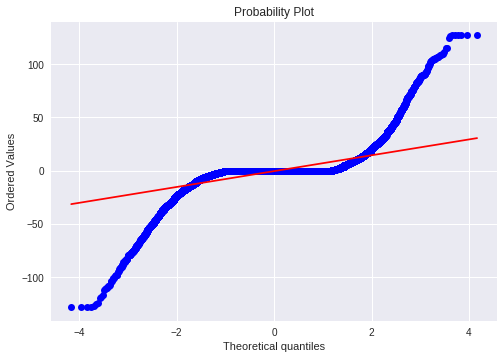

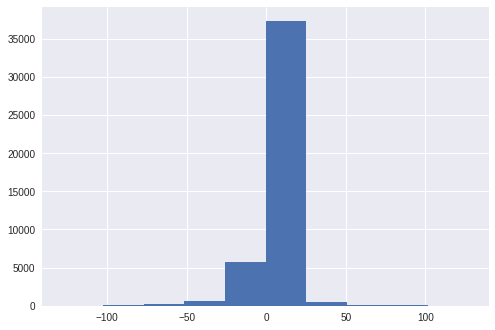

mean=-0.319 stdv=10.933
Statistics=0.462, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=13277.425, p=0.000
Sample does not look Gaussian (reject H0)
ex = 32


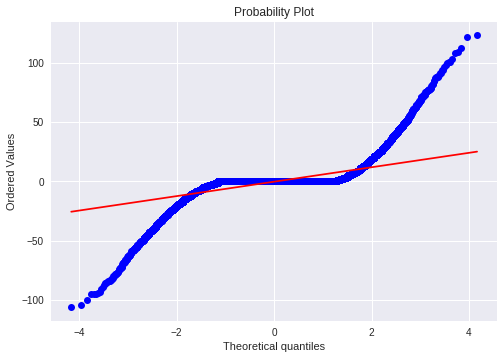

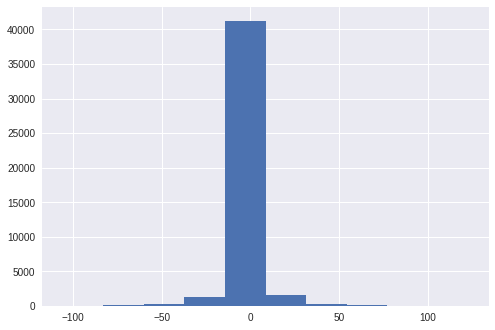

mean=-0.231 stdv=9.021
Statistics=0.454, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=13396.931, p=0.000
Sample does not look Gaussian (reject H0)
ex = 33


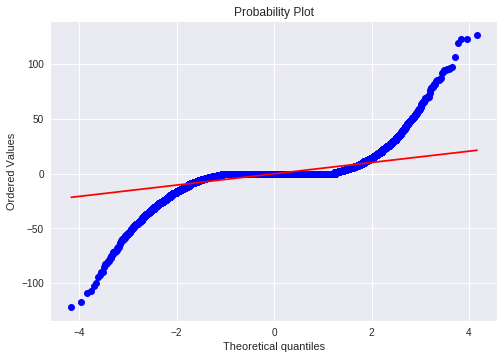

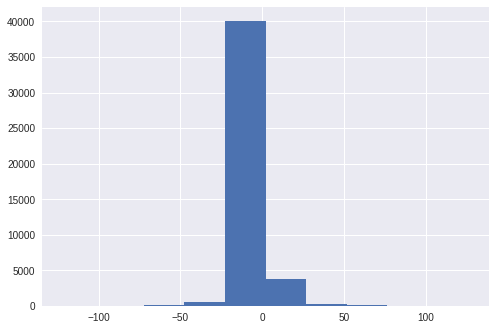

mean=-0.257 stdv=7.641
Statistics=0.454, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=15635.551, p=0.000
Sample does not look Gaussian (reject H0)
ex = 34


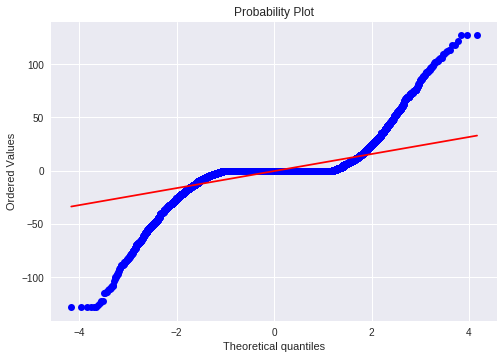

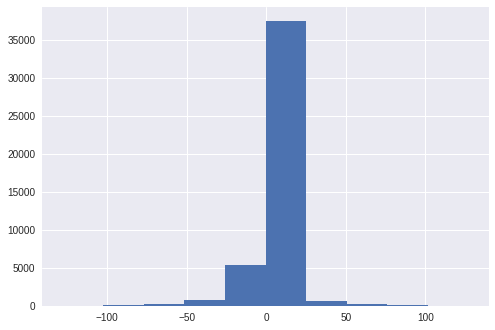

mean=-0.265 stdv=11.512
Statistics=0.482, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12385.874, p=0.000
Sample does not look Gaussian (reject H0)
ex = 35


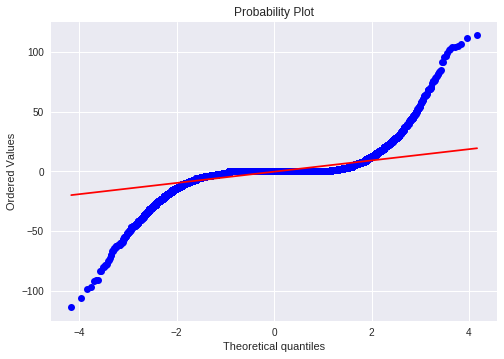

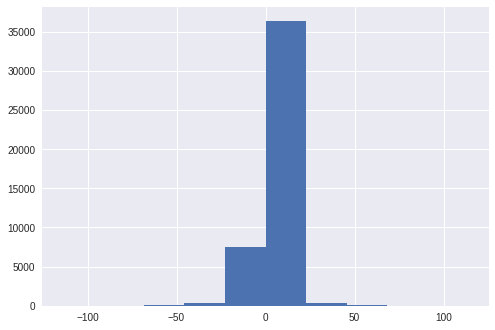

mean=-0.308 stdv=6.937
Statistics=0.462, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=16714.375, p=0.000
Sample does not look Gaussian (reject H0)
ex = 36


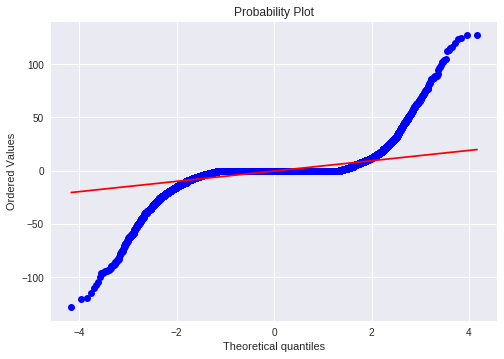

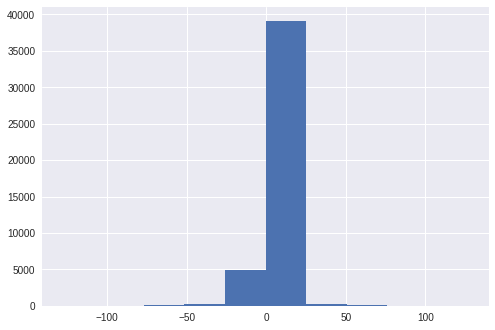

mean=-0.236 stdv=7.840
Statistics=0.381, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=16113.707, p=0.000
Sample does not look Gaussian (reject H0)
ex = 37


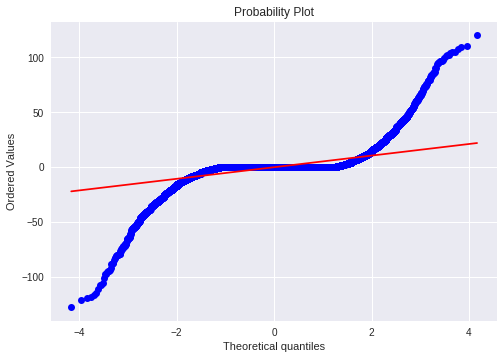

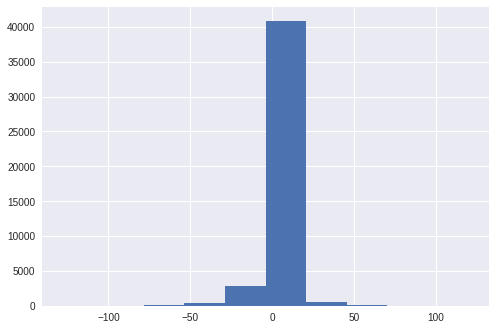

mean=-0.247 stdv=8.202
Statistics=0.416, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14839.649, p=0.000
Sample does not look Gaussian (reject H0)
ex = 38


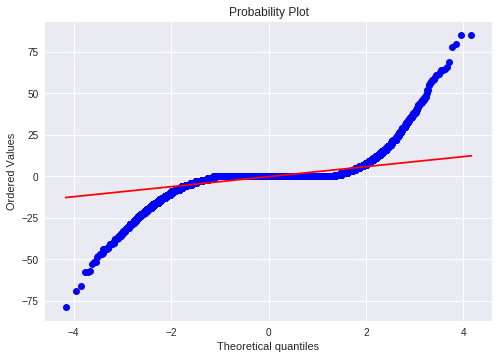

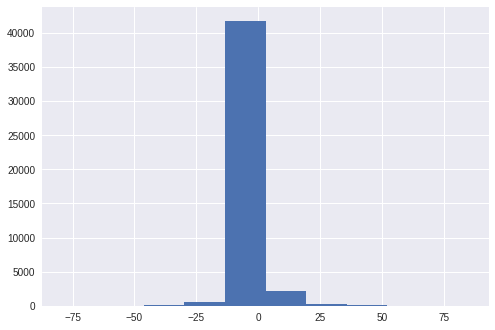

mean=-0.224 stdv=4.657
Statistics=0.422, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=19917.403, p=0.000
Sample does not look Gaussian (reject H0)
ex = 39


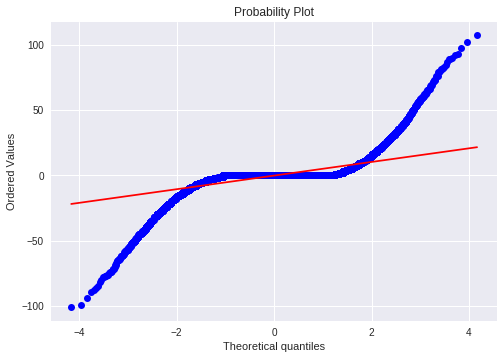

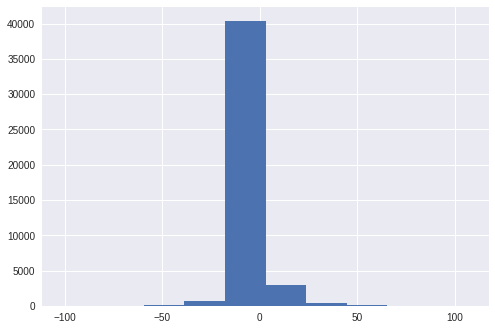

mean=-0.263 stdv=7.622
Statistics=0.468, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=13231.135, p=0.000
Sample does not look Gaussian (reject H0)
ex = 40


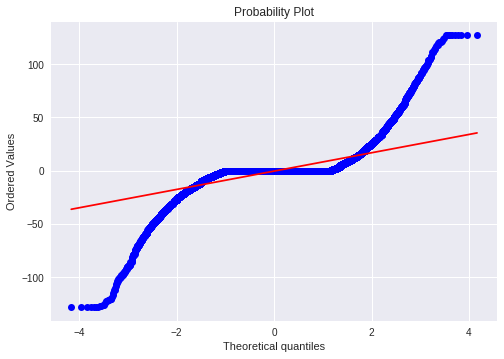

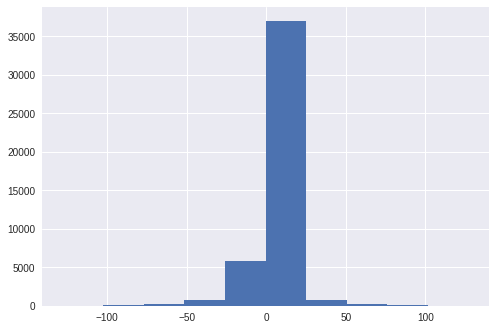

mean=-0.294 stdv=12.064
Statistics=0.508, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12607.990, p=0.000
Sample does not look Gaussian (reject H0)
ex = 41


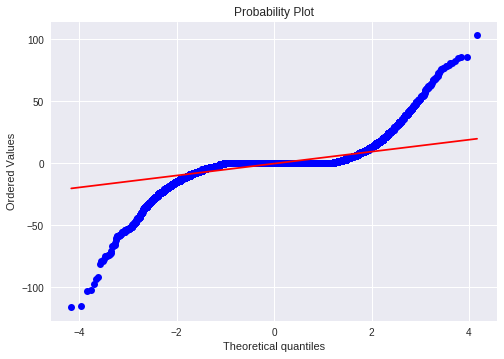

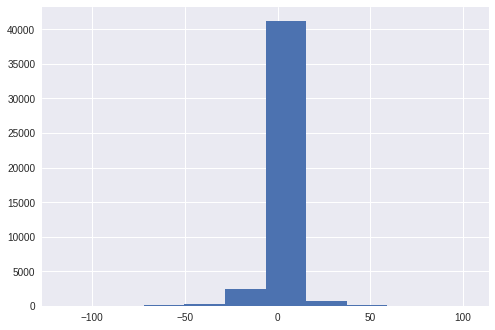

mean=-0.268 stdv=6.957
Statistics=0.476, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14205.934, p=0.000
Sample does not look Gaussian (reject H0)
ex = 42


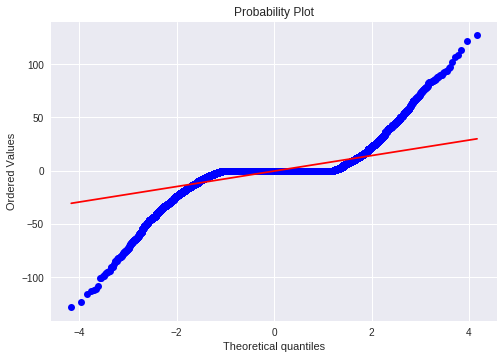

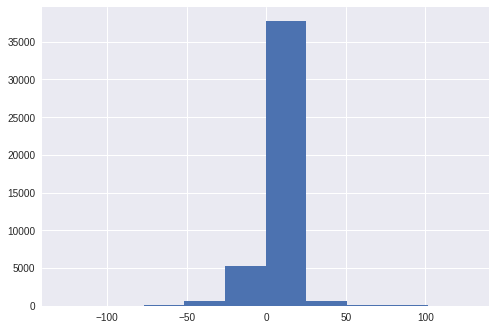

mean=-0.257 stdv=10.257
Statistics=0.502, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12003.475, p=0.000
Sample does not look Gaussian (reject H0)
ex = 43


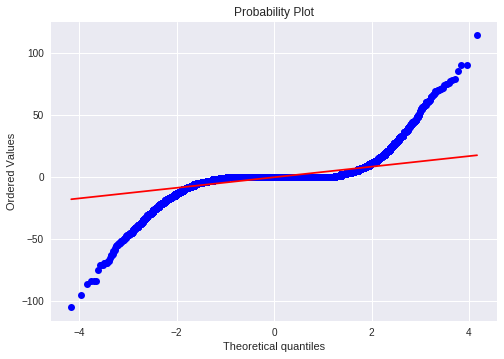

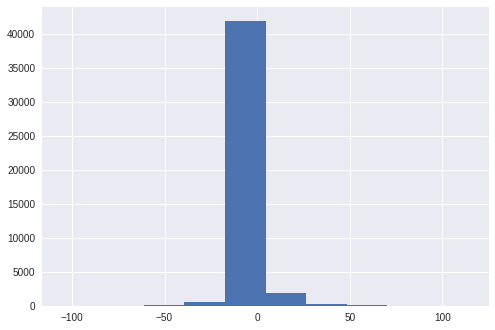

mean=-0.281 stdv=6.355
Statistics=0.448, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=15369.149, p=0.000
Sample does not look Gaussian (reject H0)
ex = 44


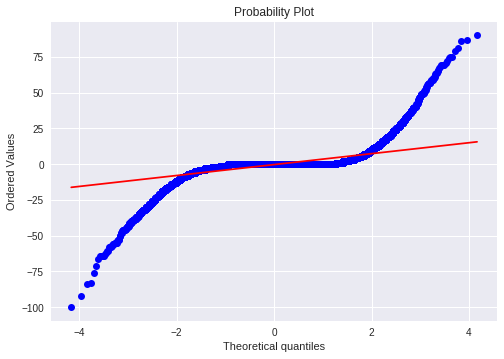

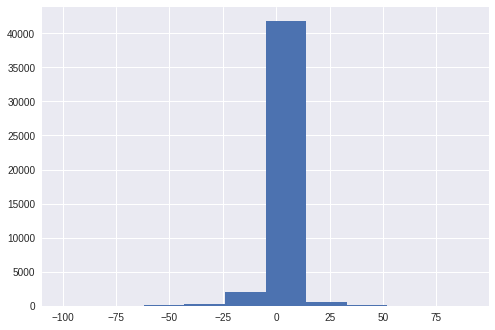

mean=-0.294 stdv=5.753
Statistics=0.441, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14966.156, p=0.000
Sample does not look Gaussian (reject H0)
ex = 45


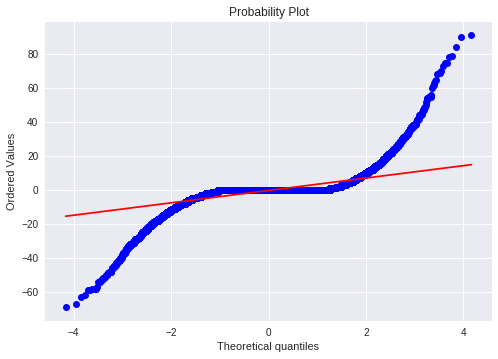

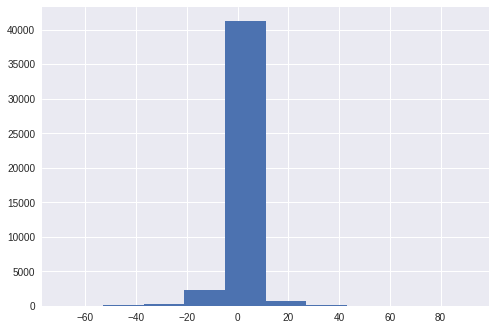

mean=-0.259 stdv=5.284
Statistics=0.476, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=15639.902, p=0.000
Sample does not look Gaussian (reject H0)
ex = 46


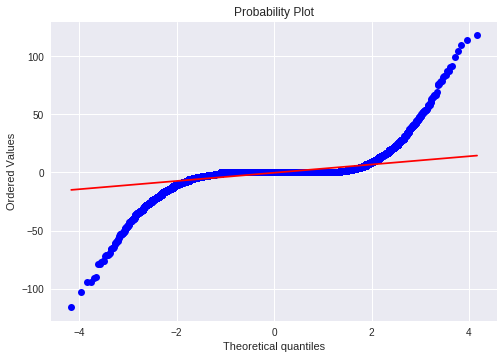

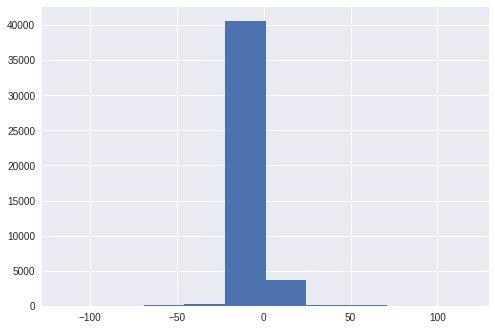

mean=-0.229 stdv=5.750
Statistics=0.381, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=18536.208, p=0.000
Sample does not look Gaussian (reject H0)
ex = 47


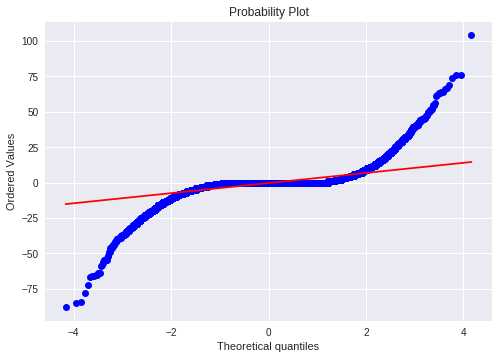

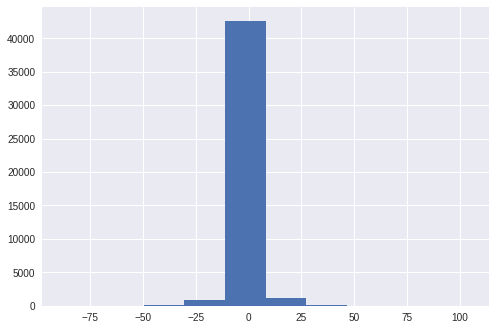

mean=-0.288 stdv=5.161
Statistics=0.479, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14544.188, p=0.000
Sample does not look Gaussian (reject H0)
ex = 48


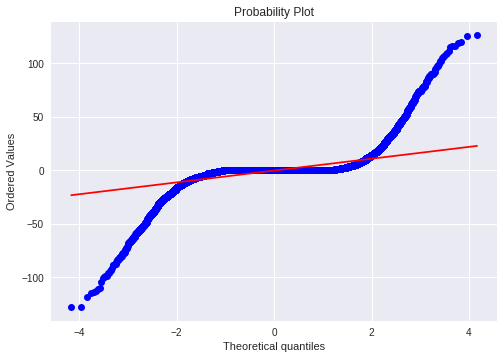

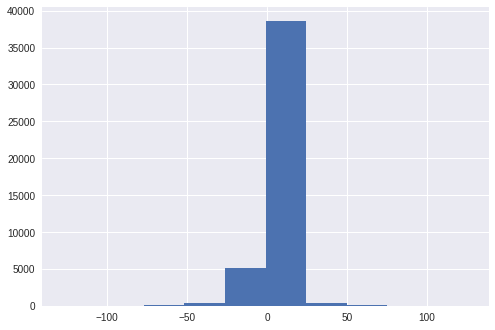

mean=-0.287 stdv=8.753
Statistics=0.399, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=15090.645, p=0.000
Sample does not look Gaussian (reject H0)
ex = 49


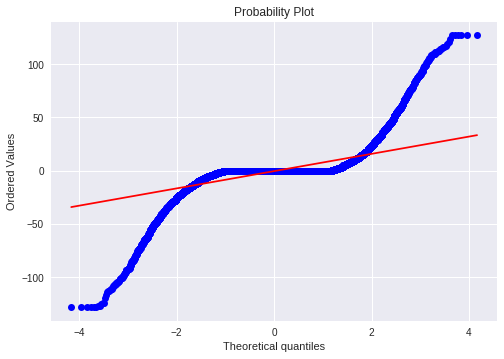

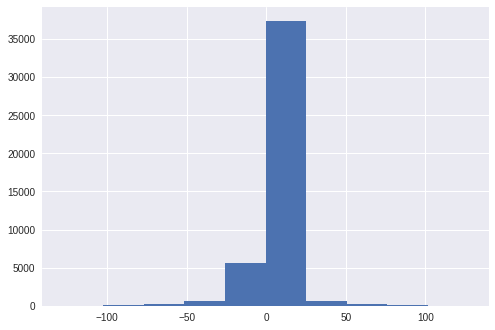

mean=-0.314 stdv=11.870
Statistics=0.466, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12904.459, p=0.000
Sample does not look Gaussian (reject H0)
ex = 50


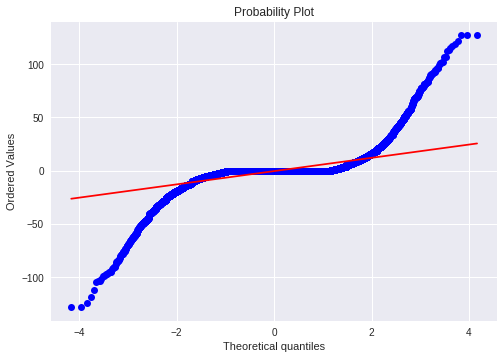

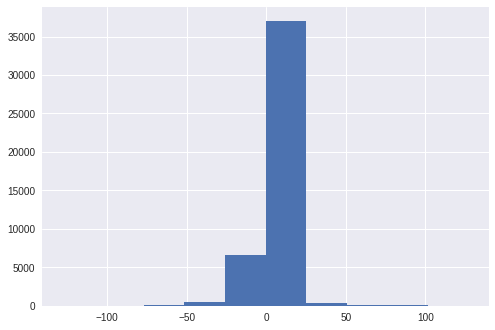

mean=-0.298 stdv=9.096
Statistics=0.468, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14816.433, p=0.000
Sample does not look Gaussian (reject H0)
ex = 51


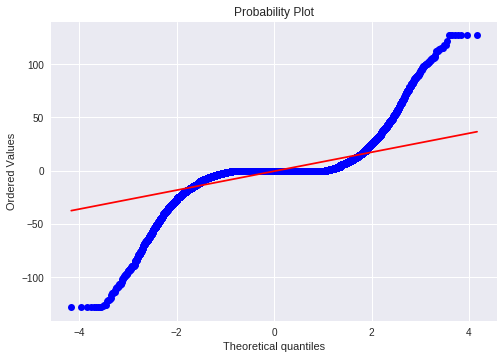

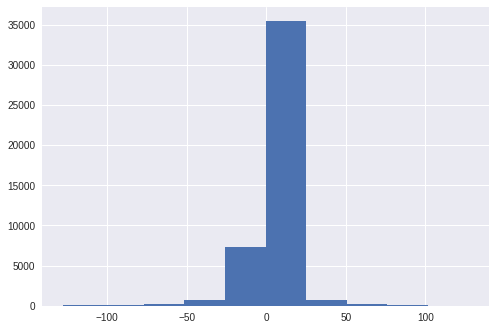

mean=-0.377 stdv=12.506
Statistics=0.505, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12812.573, p=0.000
Sample does not look Gaussian (reject H0)
ex = 52


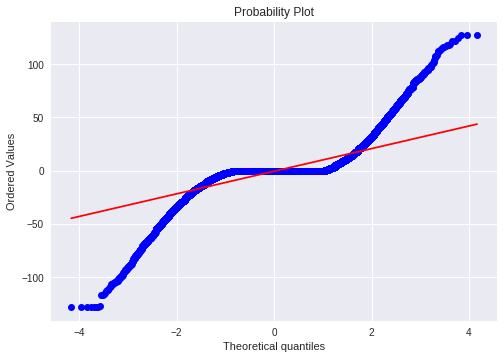

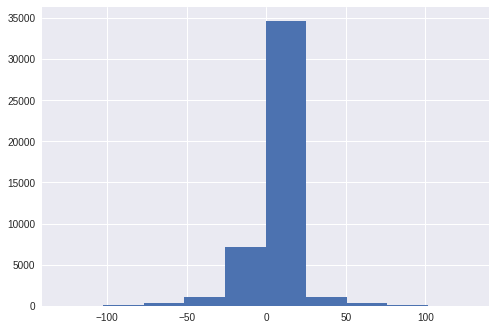

mean=-0.402 stdv=13.877
Statistics=0.584, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=10394.646, p=0.000
Sample does not look Gaussian (reject H0)


In [0]:
for i in range(1 , (nClasses+1)):
    print('ex = %d'%(i))
    r,r1 = np.where(Y == (i))
    plt.figure()
    x = np.concatenate(x_EMG[r[1],:,:].T, axis = 0)
    res = stats.probplot(x, plot=plt)
    plt.figure()
    plt.hist(x)
    plt.show()
    print('mean=%.3f stdv=%.3f' % (np.mean(x), np.std(x)))
    stat, p = stats.shapiro(x)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    stat, p = stats.normaltest(x)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

durbin_watson
- the null hypothesis of the test is that there is no serial correlation.
- The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

In [0]:
from statsmodels.stats.stattools import durbin_watson
dw = np.zeros((nClasses,nClasses))
print(dw.shape)
for i in range(1 , (nClasses+1)):
    for j in range(1 , (nClasses+1)):
        r,r1 = np.where(Y == (i))
        x1 = np.concatenate(x_EMG[r[0],:,:].T, axis = 0)
        r,r1 = np.where(Y == (j))
        x2 = np.concatenate(x_EMG[r[0],:,:].T, axis = 0)
        ols_res = OLS(x1, x2).fit()
        dw[i-1,j-1] = durbin_watson(ols_res.resid)
print(dw)

(52, 52)


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:47: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


[[2.52581214 2.52692409 2.52778348 ... 2.52900835 2.52858303 2.52882375]
 [2.5909106  2.59245531 2.5935729  ... 2.59231398 2.59224252 2.59260324]
 [2.61298067 2.61478359 2.61427896 ... 2.61401789 2.61370646 2.61373892]
 ...
 [2.48959341 2.48891254 2.48940576 ... 2.48419051 2.48977072 2.48907594]
 [2.34576518 2.34543816 2.34569142 ... 2.34636781 2.35020259 2.34577748]
 [2.57565309 2.57544607 2.57537106 ... 2.57532022 2.57542467 2.5733311 ]]


ValueError: ignored

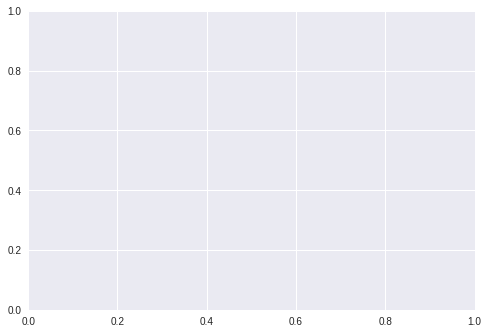

In [0]:
arg_dw = np.zeros((nClasses))
for i in range(nClasses):
    arg_dw[i] = np.argmax(dw[i])
plt.figure()
h, b = np.histogram(arg_dw)
plt.plot(b,h)
plt.show()
